# Telecommunication churn
## Objective is to identify customers churning(leaving) particular serivce due to various reasons.

## EDA

### Import statements

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.svm import SVC

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load dataset and perform initial analysis

In [4]:
df_customers = pd.read_csv('P585 Churn.csv')
df_customers

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [5]:
# Renaming 'Unnamed' column to 'slno'
df_customers.rename(columns={'Unnamed: 0' : 'slno'}, inplace=True)
df_customers

,slno,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [6]:
# Setting slno as index column of the dataset
df_customers.set_index('slno', inplace=True)
df_customers

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
slno,,,,,,,,,,,,,,,,,,,,
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no


In [7]:
print(f"Identifying shape : {df_customers.shape}")

Identifying shape : (5000, 20)


In [8]:
print(f"Identifying columns : {df_customers.columns}")

Identifying columns : Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')


In [9]:
print("Describing structure of numerical columns\n", df_customers.describe())

Describing structure of numerical columns
        account.length  voice.messages    intl.mins   intl.calls  intl.charge  \
count      5000.00000     5000.000000  5000.000000  5000.000000  5000.000000   
mean        100.25860        7.755200    10.261780     4.435200     2.771196   
std          39.69456       13.546393     2.761396     2.456788     0.745514   
min           1.00000        0.000000     0.000000     0.000000     0.000000   
25%          73.00000        0.000000     8.500000     3.000000     2.300000   
50%         100.00000        0.000000    10.300000     4.000000     2.780000   
75%         127.00000       17.000000    12.000000     6.000000     3.240000   
max         243.00000       52.000000    20.000000    20.000000     5.400000   

          day.mins    day.calls    eve.calls   eve.charge   night.mins  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    180.288900   100.029400   100.191000    17.054322   200.391620   
std      53.89

In [10]:
print("Describing structure of numerical columns\n", df_customers.describe(include=object))

Describing structure of numerical columns
        state      area.code voice.plan intl.plan day.charge eve.mins churn
count   5000           5000       5000      5000       5000     5000  5000
unique    51              3          2         2       1962     1877     2
top       WV  area_code_415         no        no      26.18      Nan    no
freq     158           2495       3677      4527         10       24  4293


In [11]:
print("Information about the dataset is as follows...\n",df_customers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   float6

In [12]:
# Visualization of numerical columns and studying their cor-relation
z=df_customers.corr(numeric_only = True)
z

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
account.length,1.000000,-0.014575,0.001291,0.014277,0.001292,-0.001017,0.028240,0.009143,-0.009587,0.000668,-0.007825,0.000656,-0.001445
voice.messages,-0.014575,1.000000,0.002463,0.000124,0.002505,0.005381,0.000883,-0.003954,0.019496,0.005541,0.002676,0.005535,-0.007086
intl.mins,0.001291,0.002463,1.000000,0.016791,0.999993,-0.019486,0.013097,-0.007458,0.000132,-0.006721,0.000391,-0.006717,-0.012122
intl.calls,0.014277,0.000124,0.016791,1.000000,0.016900,-0.001303,0.010893,0.005574,0.008393,-0.017214,-0.000156,-0.017182,-0.019147
intl.charge,0.001292,0.002505,0.999993,0.016900,1.000000,-0.019415,0.013161,-0.007507,0.000155,-0.006655,0.000368,-0.006650,-0.012180
day.mins,-0.001017,0.005381,-0.019486,-0.001303,-0.019415,1.000000,0.001935,0.008128,-0.010760,0.011799,0.004236,0.011783,0.002733
day.calls,0.028240,0.000883,0.013097,0.010893,0.013161,0.001935,1.000000,0.003754,-0.000695,0.002804,-0.008308,0.002802,-0.010739
eve.calls,0.009143,-0.003954,-0.007458,0.005574,-0.007507,0.008128,0.003754,1.000000,0.002778,0.001781,-0.013682,0.001799,0.006235
eve.charge,-0.009587,0.019496,0.000132,0.008393,0.000155,-0.010760,-0.000695,0.002778,1.000000,-0.016649,0.013422,-0.016652,-0.013836
night.mins,0.000668,0.005541,-0.006721,-0.017214,-0.006655,0.011799,0.002804,0.001781,-0.016649,1.000000,0.026972,0.999999,-0.008533


### Identifying duplicate values

In [13]:
df_customers.duplicated() # Shows if any column values are repeated and marks 'True' if Yes / 'False' if No.

,0
slno,
1,False
2,False
3,False
4,False
5,False
...,...
4996,False
4997,False
4998,False


In [14]:
# The result may not show for full dataset. So we can use below statement to identify duplicate columns.
df_customers.duplicated().sum()

np.int64(0)

Inference : No duplicated identified.

### Identifying NULL values

In [15]:
# In the dataset we need to first identify str 'Nan' occurances and need to replace it with np.nan to detect NULL values.
mask_str_nan = df_customers.map(lambda x: isinstance(x, str) and x.strip().lower() == 'nan')
print(mask_str_nan)

      state  area.code  account.length  voice.plan  voice.messages  intl.plan  \
slno                                                                            
1     False      False           False       False           False      False   
2     False      False           False       False           False      False   
3     False      False           False       False           False      False   
4     False      False           False       False           False      False   
5     False      False           False       False           False      False   
...     ...        ...             ...         ...             ...        ...   
4996  False      False           False       False           False      False   
4997  False      False           False       False           False      False   
4998  False      False           False       False           False      False   
4999  False      False           False       False           False      False   
5000  False      False      

In [16]:
# Replace the str 'Nan' to np.nan
df_customers.replace(to_replace=r'^\s*[Nn]an\s*$', value=np.nan, regex=True,inplace=True)

In [17]:
# Handling null values - NAN in the dataset
df_customers.isna().sum()

,0
state,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0


In [18]:
# Change the datatype of NULL valued columns to flaot as to match their other column values.
df_customers['day.charge'] = df_customers['day.charge'].astype(float)
df_customers['eve.mins'] = df_customers['eve.mins'].astype(float)

In [19]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   float6

### Treating NULL values

<Axes: xlabel='day.charge'>

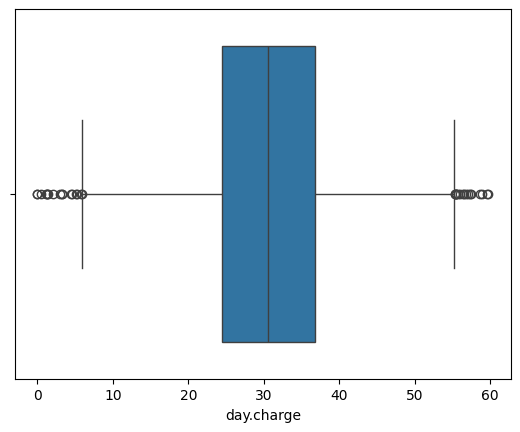

In [20]:
# Using boxplot to identify Outliers
sns.boxplot(x=df_customers['day.charge'])

<Axes: xlabel='eve.mins'>

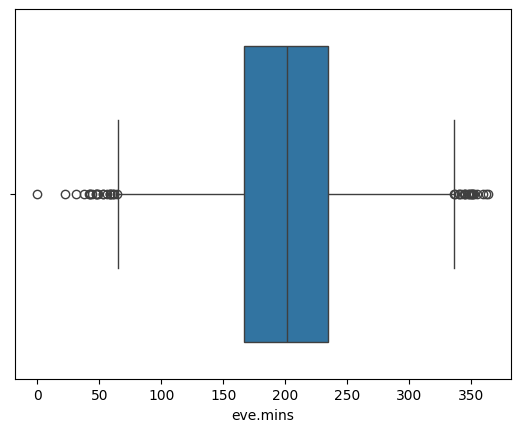

In [21]:
sns.boxplot(x= df_customers['eve.mins'])

In [22]:
# Treating NULL values, since there are outliers in both these columns will treat with median. If not would have treated with mean.
median_day_charge = df_customers['day.charge'].median()
print('Median - Day Charge : ',median_day_charge)

median_eve_mins= df_customers['eve.mins'].median()
print('Median - Eve Mins : ',median_eve_mins)

Median - Day Charge :  30.62
Median - Eve Mins :  201.0


In [23]:
df_customers['day.charge'] = df_customers['day.charge'].fillna(median_day_charge)
df_customers['eve.mins'] = df_customers['eve.mins'].fillna(median_eve_mins)

In [24]:
# Handling null values - NAN in the dataset
df_customers.isna().sum()

,0
state,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0


### Data visualization before cleaning dataset

In [25]:
# Correlation
z = df_customers.corr(numeric_only = True)
z

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
account.length,1.000000,-0.014575,0.001291,0.014277,0.001292,-0.001017,0.028240,-0.000799,-0.008676,0.009143,-0.009587,0.000668,-0.007825,0.000656,-0.001445
voice.messages,-0.014575,1.000000,0.002463,0.000124,0.002505,0.005381,0.000883,0.005141,0.018869,-0.003954,0.019496,0.005541,0.002676,0.005535,-0.007086
intl.mins,0.001291,0.002463,1.000000,0.016791,0.999993,-0.019486,0.013097,-0.019282,-0.000356,-0.007458,0.000132,-0.006721,0.000391,-0.006717,-0.012122
intl.calls,0.014277,0.000124,0.016791,1.000000,0.016900,-0.001303,0.010893,-0.001597,0.007997,0.005574,0.008393,-0.017214,-0.000156,-0.017182,-0.019147
intl.charge,0.001292,0.002505,0.999993,0.016900,1.000000,-0.019415,0.013161,-0.019212,-0.000333,-0.007507,0.000155,-0.006655,0.000368,-0.006650,-0.012180
day.mins,-0.001017,0.005381,-0.019486,-0.001303,-0.019415,1.000000,0.001935,0.999769,-0.010906,0.008128,-0.010760,0.011799,0.004236,0.011783,0.002733
day.calls,0.028240,0.000883,0.013097,0.010893,0.013161,0.001935,1.000000,0.001666,-0.001719,0.003754,-0.000695,0.002804,-0.008308,0.002802,-0.010739
day.charge,-0.000799,0.005141,-0.019282,-0.001597,-0.019212,0.999769,0.001666,1.000000,-0.011530,0.007983,-0.011383,0.011317,0.004207,0.011301,0.002930
eve.mins,-0.008676,0.018869,-0.000356,0.007997,-0.000333,-0.010906,-0.001719,-0.011530,1.000000,0.003119,0.997671,-0.016503,0.015578,-0.016504,-0.012401
eve.calls,0.009143,-0.003954,-0.007458,0.005574,-0.007507,0.008128,0.003754,0.007983,0.003119,1.000000,0.002778,0.001781,-0.013682,0.001799,0.006235


In [26]:
calls_columns = ['intl.calls','day.calls','eve.calls','night.calls','customer.calls']
df_calls = df_customers.loc[:,calls_columns]
df_calls

,intl.calls,day.calls,eve.calls,night.calls,customer.calls
slno,,,,,
1,3,110,99,91,1
2,3,123,103,103,1
3,5,114,110,104,0
4,7,71,88,89,2
5,3,113,122,121,3
...,...,...,...,...,...
4996,5,127,126,116,2
4997,2,90,73,113,3
4998,4,89,128,97,1


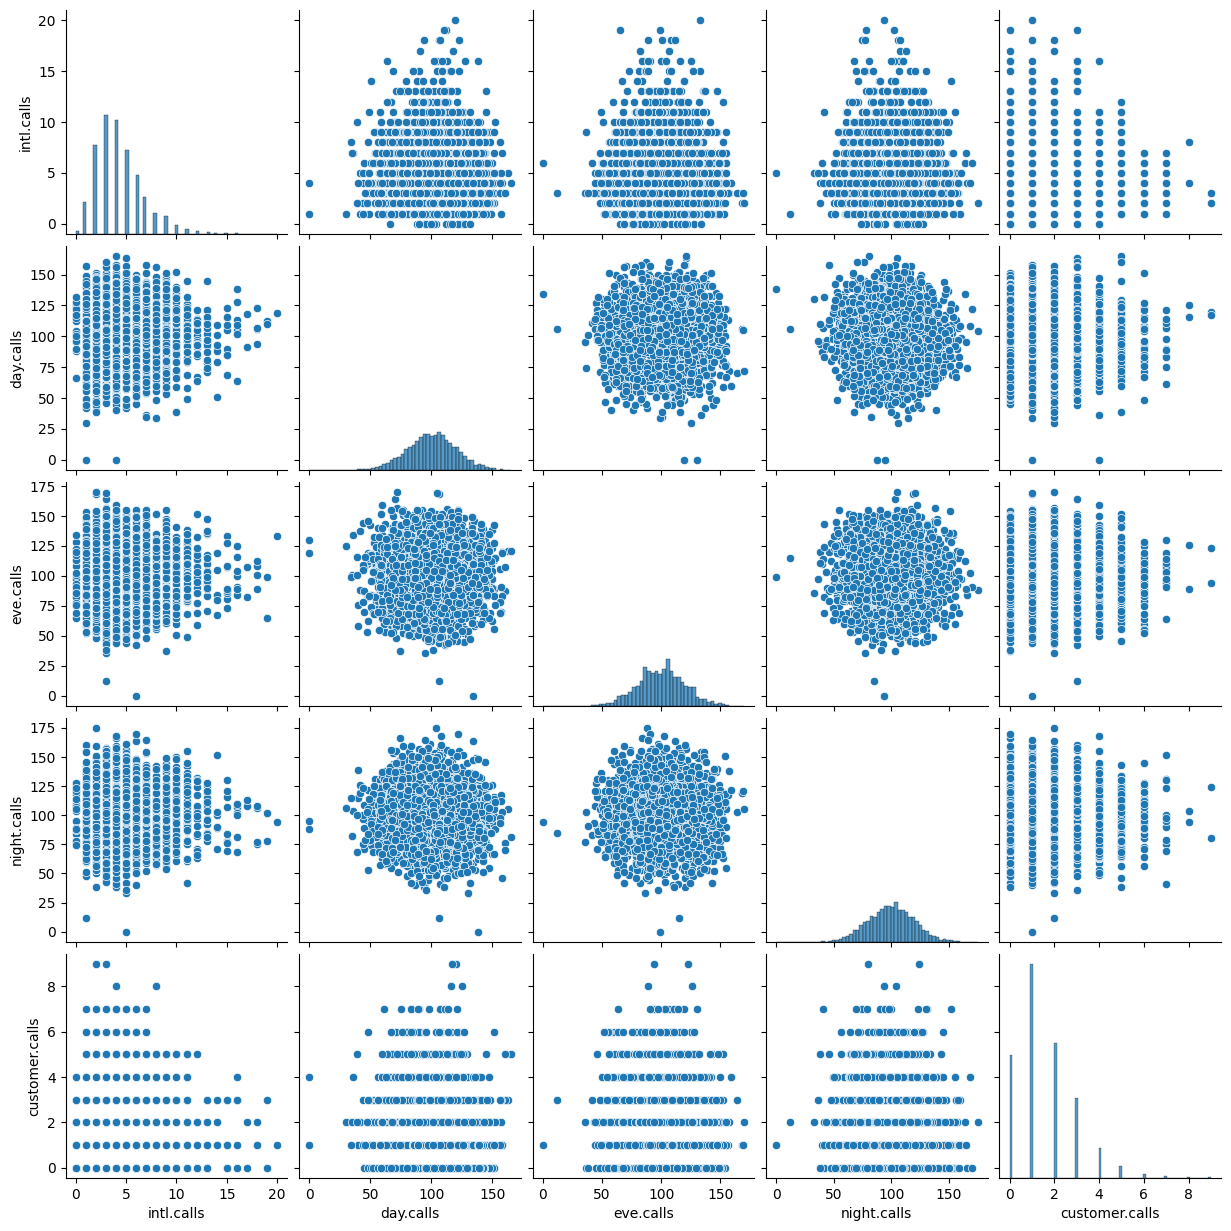

In [27]:
sns.pairplot(df_calls)

array([[<Axes: title={'center': 'intl.calls'}>,
        <Axes: title={'center': 'day.calls'}>],
       [<Axes: title={'center': 'eve.calls'}>,
        <Axes: title={'center': 'night.calls'}>],
       [<Axes: title={'center': 'customer.calls'}>, <Axes: >]],
      dtype=object)

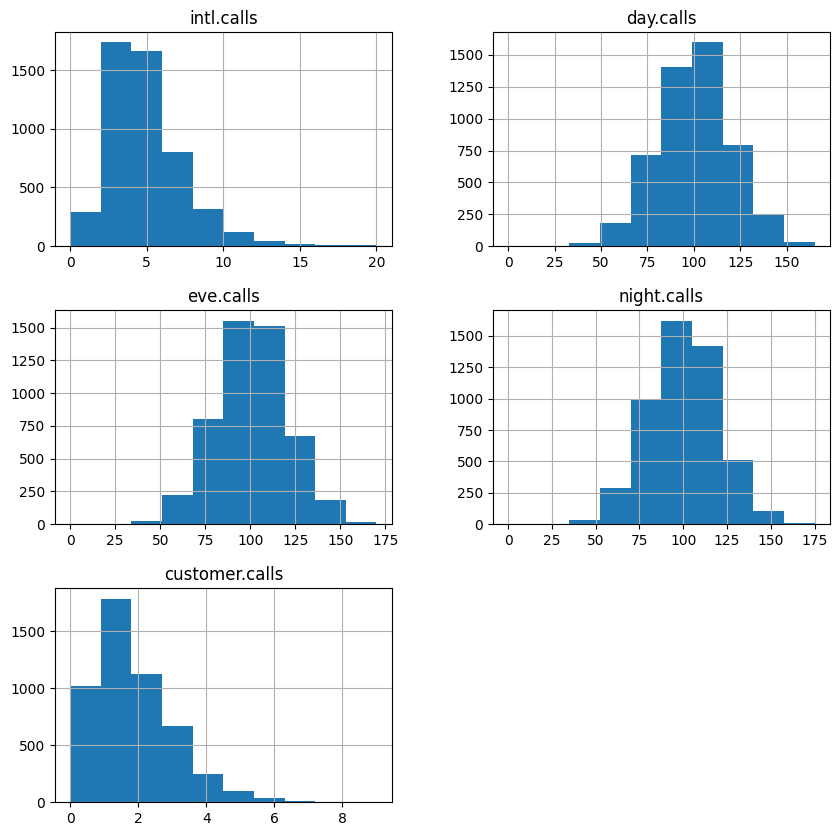

In [28]:
df_calls.hist(figsize=(10,10))

<Axes: >

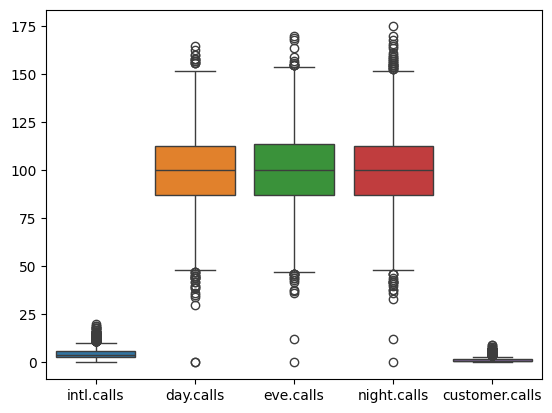

In [29]:
sns.boxplot(df_calls)

In [30]:
mins_columns = ['intl.mins', 'day.mins', 'eve.mins', 'night.mins']
df_mins = df_customers.loc[:,mins_columns]
df_mins

,intl.mins,day.mins,eve.mins,night.mins
slno,,,,
1,10.0,265.1,197.4,244.7
2,13.7,161.6,195.5,254.4
3,12.2,243.4,121.2,162.6
4,6.6,299.4,61.9,196.9
5,10.1,166.7,148.3,186.9
...,...,...,...,...
4996,9.9,235.7,223.0,297.5
4997,14.7,184.2,256.8,213.6
4998,13.6,140.6,172.8,212.4


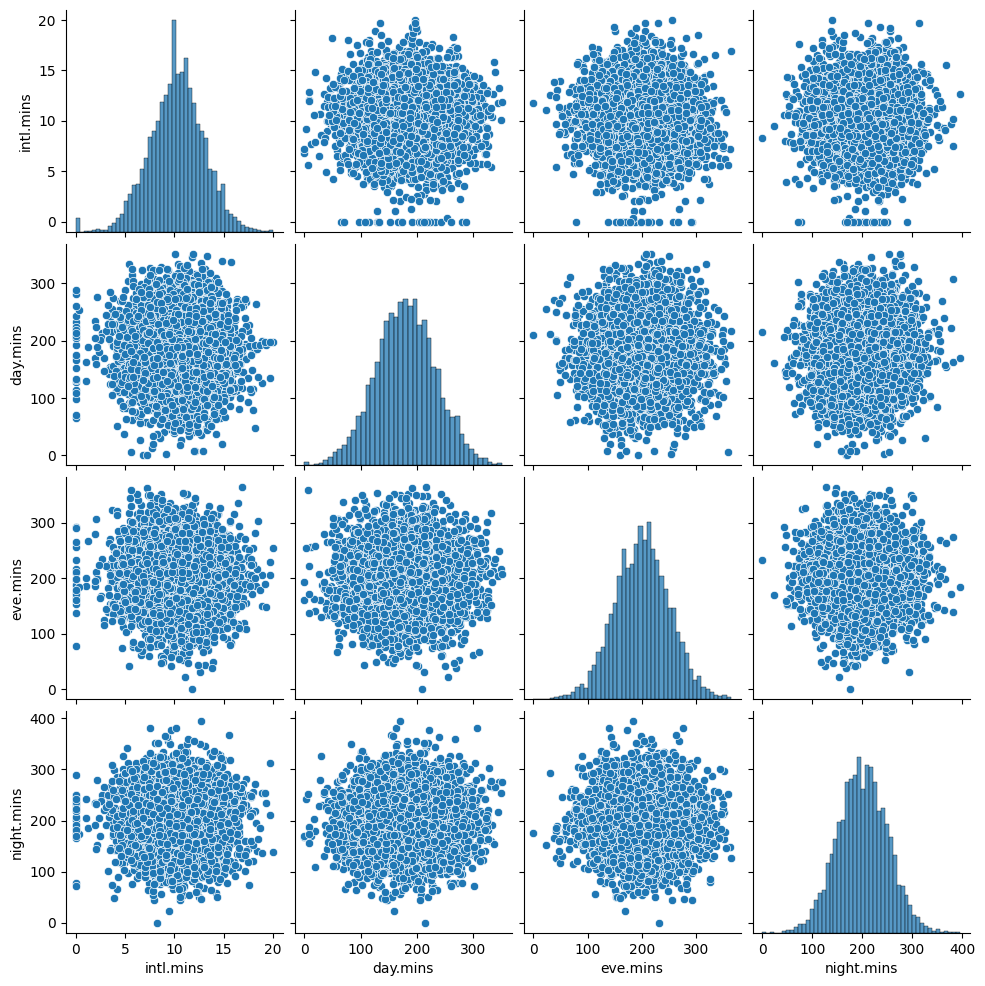

In [31]:
sns.pairplot(df_mins)

array([[<Axes: title={'center': 'intl.mins'}>,
        <Axes: title={'center': 'day.mins'}>],
       [<Axes: title={'center': 'eve.mins'}>,
        <Axes: title={'center': 'night.mins'}>]], dtype=object)

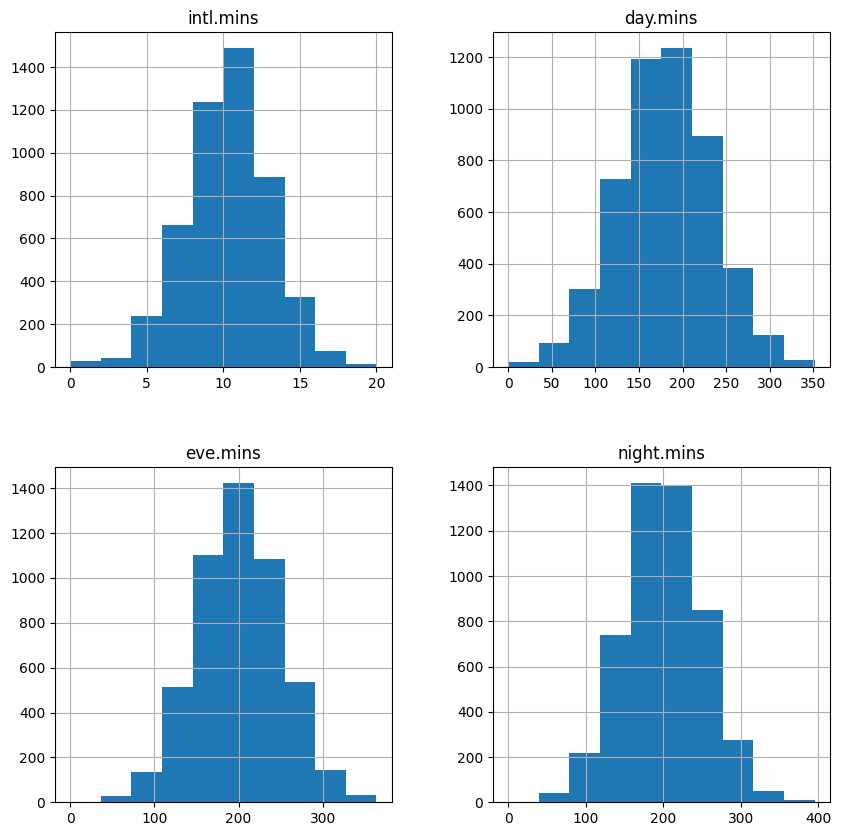

In [32]:
df_mins.hist(figsize=(10,10))

<Axes: >

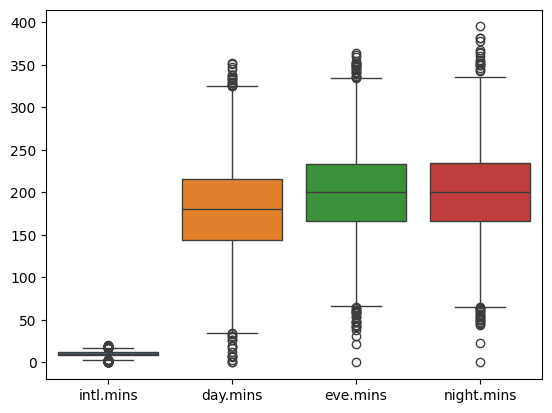

In [33]:
sns.boxplot(df_mins)

In [34]:
charge_cols = ['intl.charge', 'day.charge', 'eve.charge','night.charge']
df_charge = df_customers.loc[:,charge_cols]
df_charge

,intl.charge,day.charge,eve.charge,night.charge
slno,,,,
1,2.70,45.07,16.78,11.01
2,3.70,27.47,16.62,11.45
3,3.29,41.38,10.30,7.32
4,1.78,50.90,5.26,8.86
5,2.73,28.34,12.61,8.41
...,...,...,...,...
4996,2.67,40.07,18.96,13.39
4997,3.97,31.31,21.83,9.61
4998,3.67,23.90,14.69,9.56


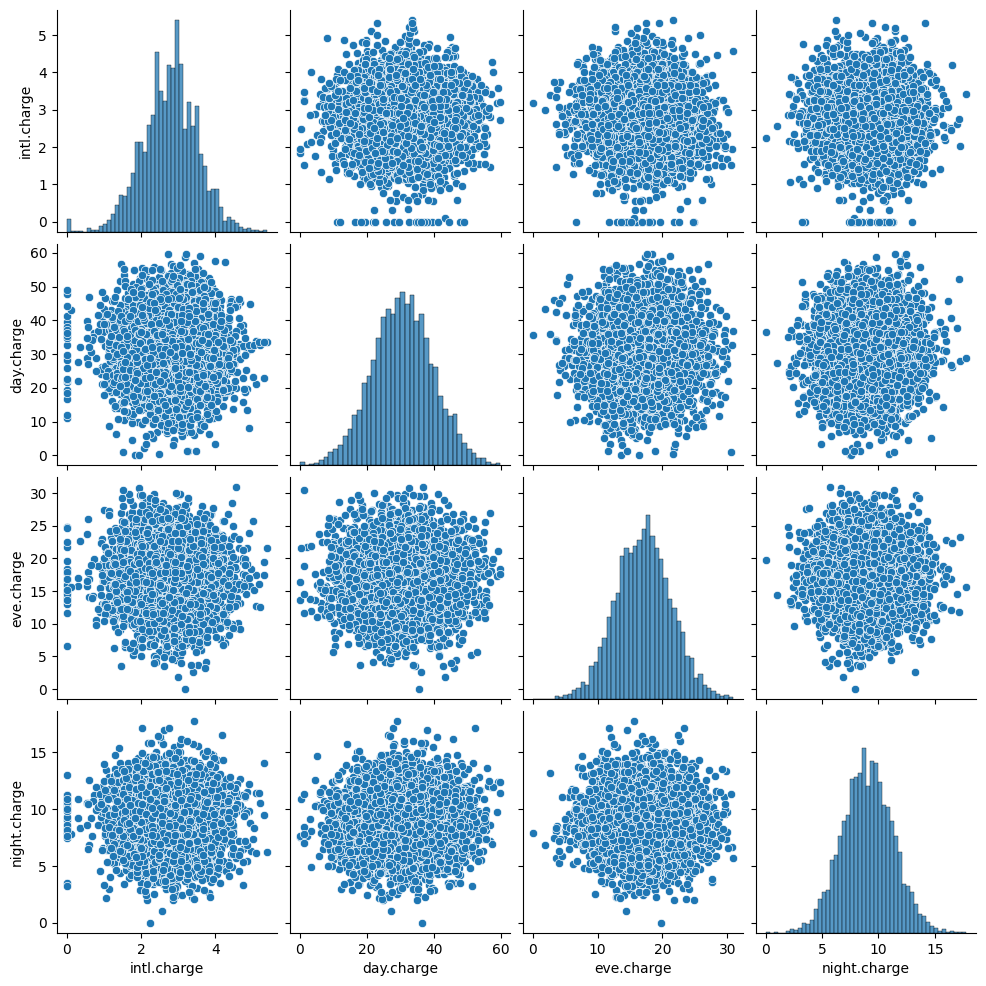

In [35]:
sns.pairplot(df_charge)

array([[<Axes: title={'center': 'intl.charge'}>,
        <Axes: title={'center': 'day.charge'}>],
       [<Axes: title={'center': 'eve.charge'}>,
        <Axes: title={'center': 'night.charge'}>]], dtype=object)

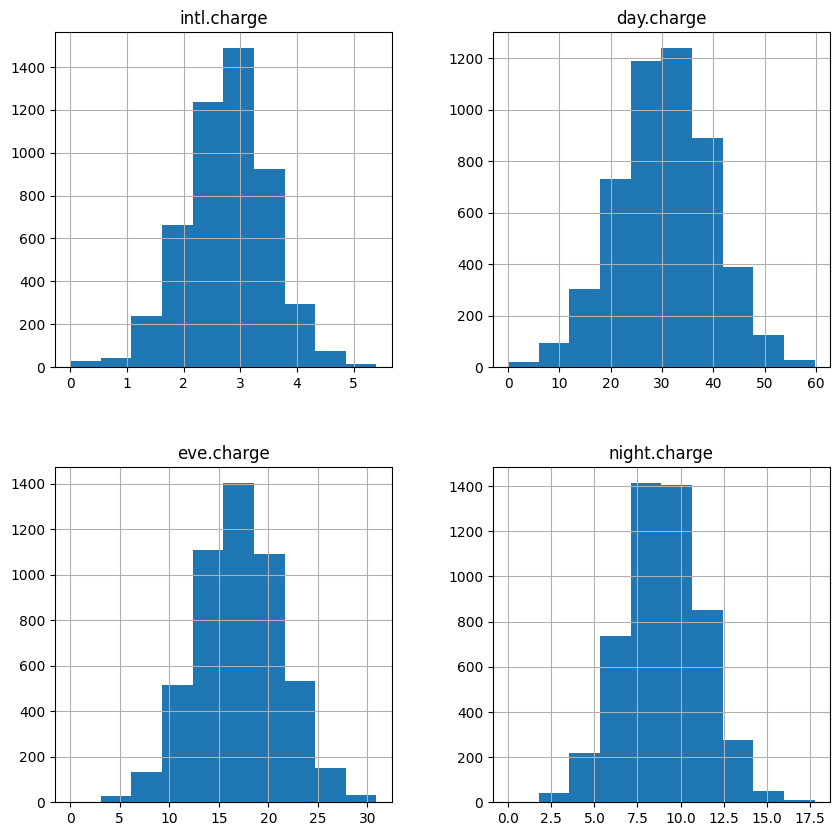

In [36]:
df_charge.hist(figsize=(10,10))

<Axes: >

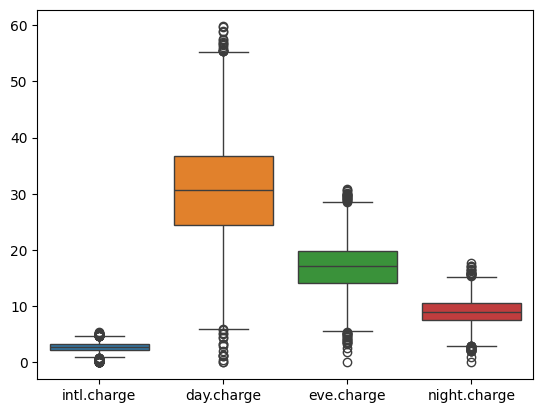

In [37]:
sns.boxplot(df_charge)

## Feature Extraction

### Identifying numerical columns

In [38]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   float64
 12  eve.mins        5000 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   float6

In [39]:
# To identify numerical columns,choose dtypes of float and int in the dataset.
num_columns = df_customers.select_dtypes(include=['float','int']).columns.tolist()
num_columns

['account.length',
 'voice.messages',
 'intl.mins',
 'intl.calls',
 'intl.charge',
 'day.mins',
 'day.calls',
 'day.charge',
 'eve.mins',
 'eve.calls',
 'eve.charge',
 'night.mins',
 'night.calls',
 'night.charge',
 'customer.calls']

### Identifying outliers for numerical columns

In [40]:
df_num_columns = df_customers.loc[:,num_columns]
df_num_columns

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
slno,,,,,,,,,,,,,,,
1,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1
2,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1
3,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0
4,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2
5,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2
4997,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3
4998,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1


In [41]:
# Detecting with Z-score method
for ncols in num_columns:
    df_num_columns[ncols] = np.abs(stats.zscore(df_num_columns[ncols]))
    df_num_columns_outliers = df_num_columns[(df_num_columns[ncols]<-3) | (df_num_columns[ncols]>3)]
df_num_columns_outliers

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
slno,,,,,,,,,,,,,,,
333,0.359244,0.572549,0.701969,0.229917,0.695971,0.964735,1.057561,0.965546,0.069056,0.362733,0.070832,1.227004,2.609691,1.226166,4.156687
523,0.547772,1.420801,0.384547,0.229917,0.390637,1.362257,0.808373,1.362214,0.567494,0.444349,0.564582,0.195786,1.156545,0.196932,4.156687
543,1.303619,0.904006,1.426313,0.584236,1.420376,1.061641,1.007130,1.061964,1.047385,0.312290,1.044052,1.282757,0.998121,1.280943,5.687807
695,1.631152,0.572549,0.231145,0.177160,0.226449,0.484120,0.455358,0.485145,1.348805,0.393906,1.344302,0.229434,0.046060,0.227721,3.391126
722,0.069069,2.085251,0.231145,0.229917,0.226449,1.727409,0.404928,1.728728,0.620335,0.494791,0.620127,0.666861,0.998121,0.667565,3.391126
779,0.371408,1.346973,1.209010,0.229917,1.205738,0.181648,0.351532,0.181619,0.329532,1.169814,0.327175,0.500931,1.449098,0.502419,3.391126
903,1.228034,0.572549,0.746719,0.636993,0.752839,0.254019,1.968278,0.254771,0.361260,0.343464,0.359760,0.156531,1.557413,0.154943,4.156687
909,1.946522,0.572549,1.716050,0.177160,1.715504,0.183916,0.556220,0.183049,0.677843,0.393906,0.678315,0.384151,1.348881,0.383662,3.391126
975,1.996912,1.716112,0.275895,1.044069,0.269903,0.823705,0.505789,0.824701,1.396397,0.816716,1.393180,0.421427,0.547145,0.421252,3.391126


In [42]:
print(f"Shape of dataset that has outliers with deviation <-3 or > 3 :", df_num_columns_outliers.shape)

Shape of dataset that has outliers with deviation <-3 or > 3 : (51, 15)


### Treating outliers in numerical columns

In [43]:
# To treat this, we will fit the values that are Z-score < 3
for ncols in num_columns:
    df_num_columns[ncols] = np.abs(stats.zscore(df_num_columns[ncols]))
    df_num_columns_no_outliers = df_customers[(df_num_columns[ncols]>-3) & (df_num_columns[ncols]<3)]
df_num_columns_no_outliers

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
slno,,,,,,,,,,,,,,,,,,,,
1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no


In [44]:
print(f"Shape of dataset that is now cleaned and removed outliers :", df_num_columns_no_outliers.shape)

Shape of dataset that is now cleaned and removed outliers : (4853, 20)


In [45]:
# Treating outliers with Isolation method
iso = IsolationForest(contamination=0.01, random_state = 42)
yhat = iso.fit_predict(df_num_columns[num_columns])
mask = yhat!= -1
df_num_columns_no_outliers_iso = df_num_columns[mask]
df_num_columns_no_outliers_iso

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
slno,,,,,,,,,,,,,,,
1,0.167848,0.799444,1.098418,0.269503,1.097499,1.287049,0.479420,1.286925,1.206181,1.218849,1.212669,0.132187,0.577068,0.130988,0.617478
2,1.049109,0.936512,0.743330,0.269503,0.744534,0.747966,0.599400,0.745274,1.144081,1.083805,1.151048,0.450202,1.060525,0.451561,0.617478
3,0.209836,0.501281,0.126393,0.814221,0.136094,0.619197,0.147475,0.619360,1.284373,0.499559,1.282976,0.081466,0.977719,0.083603,0.669735
4,0.649722,0.501281,0.872953,0.437429,0.878544,2.342685,1.102196,2.341641,3.222560,0.300748,3.224033,1.205993,0.411455,1.205608,0.798717
5,0.272038,0.501281,1.156399,0.269503,1.161935,0.904926,0.230461,0.902668,0.398624,0.502007,0.393325,0.878143,0.429991,0.877749,0.488495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.777083,2.855469,1.040436,0.814221,1.033063,0.382218,0.931344,0.382366,0.577486,0.835862,0.584384,1.863238,0.015958,1.864995,0.798717
4997,0.839308,0.501281,1.323145,0.356322,1.324459,1.202776,0.474540,1.202422,0.527248,0.951209,0.520940,0.887429,0.232461,0.889016,0.488495
4998,0.315470,0.501281,0.685348,0.895328,0.680097,0.101658,0.391554,0.099419,0.402144,1.002789,0.407746,0.926771,1.073907,0.925445,0.617478


In [46]:
print(f"Shape of dataset that is now cleaned and removed outliers using Isolation Forest :", df_num_columns_no_outliers_iso.shape)

Shape of dataset that is now cleaned and removed outliers using Isolation Forest : (4950, 15)


In [47]:
# Treating outliers using IQR
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

# Remove outliers
for ncols in num_columns:
    df_cleaned_iqr = remove_outliers_iqr(df_num_columns, ncols)
df_cleaned_iqr

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
slno,,,,,,,,,,,,,,,
1,0.167848,0.799444,1.098418,0.269503,1.097499,1.287049,0.479420,1.286925,1.206181,1.218849,1.212669,0.132187,0.577068,0.130988,0.617478
2,1.049109,0.936512,0.743330,0.269503,0.744534,0.747966,0.599400,0.745274,1.144081,1.083805,1.151048,0.450202,1.060525,0.451561,0.617478
3,0.209836,0.501281,0.126393,0.814221,0.136094,0.619197,0.147475,0.619360,1.284373,0.499559,1.282976,0.081466,0.977719,0.083603,0.669735
4,0.649722,0.501281,0.872953,0.437429,0.878544,2.342685,1.102196,2.341641,3.222560,0.300748,3.224033,1.205993,0.411455,1.205608,0.798717
5,0.272038,0.501281,1.156399,0.269503,1.161935,0.904926,0.230461,0.902668,0.398624,0.502007,0.393325,0.878143,0.429991,0.877749,0.488495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.777083,2.855469,1.040436,0.814221,1.033063,0.382218,0.931344,0.382366,0.577486,0.835862,0.584384,1.863238,0.015958,1.864995,0.798717
4997,0.839308,0.501281,1.323145,0.356322,1.324459,1.202776,0.474540,1.202422,0.527248,0.951209,0.520940,0.887429,0.232461,0.889016,0.488495
4998,0.315470,0.501281,0.685348,0.895328,0.680097,0.101658,0.391554,0.099419,0.402144,1.002789,0.407746,0.926771,1.073907,0.925445,0.617478


### Visualization of cleaned dataset

<Axes: >

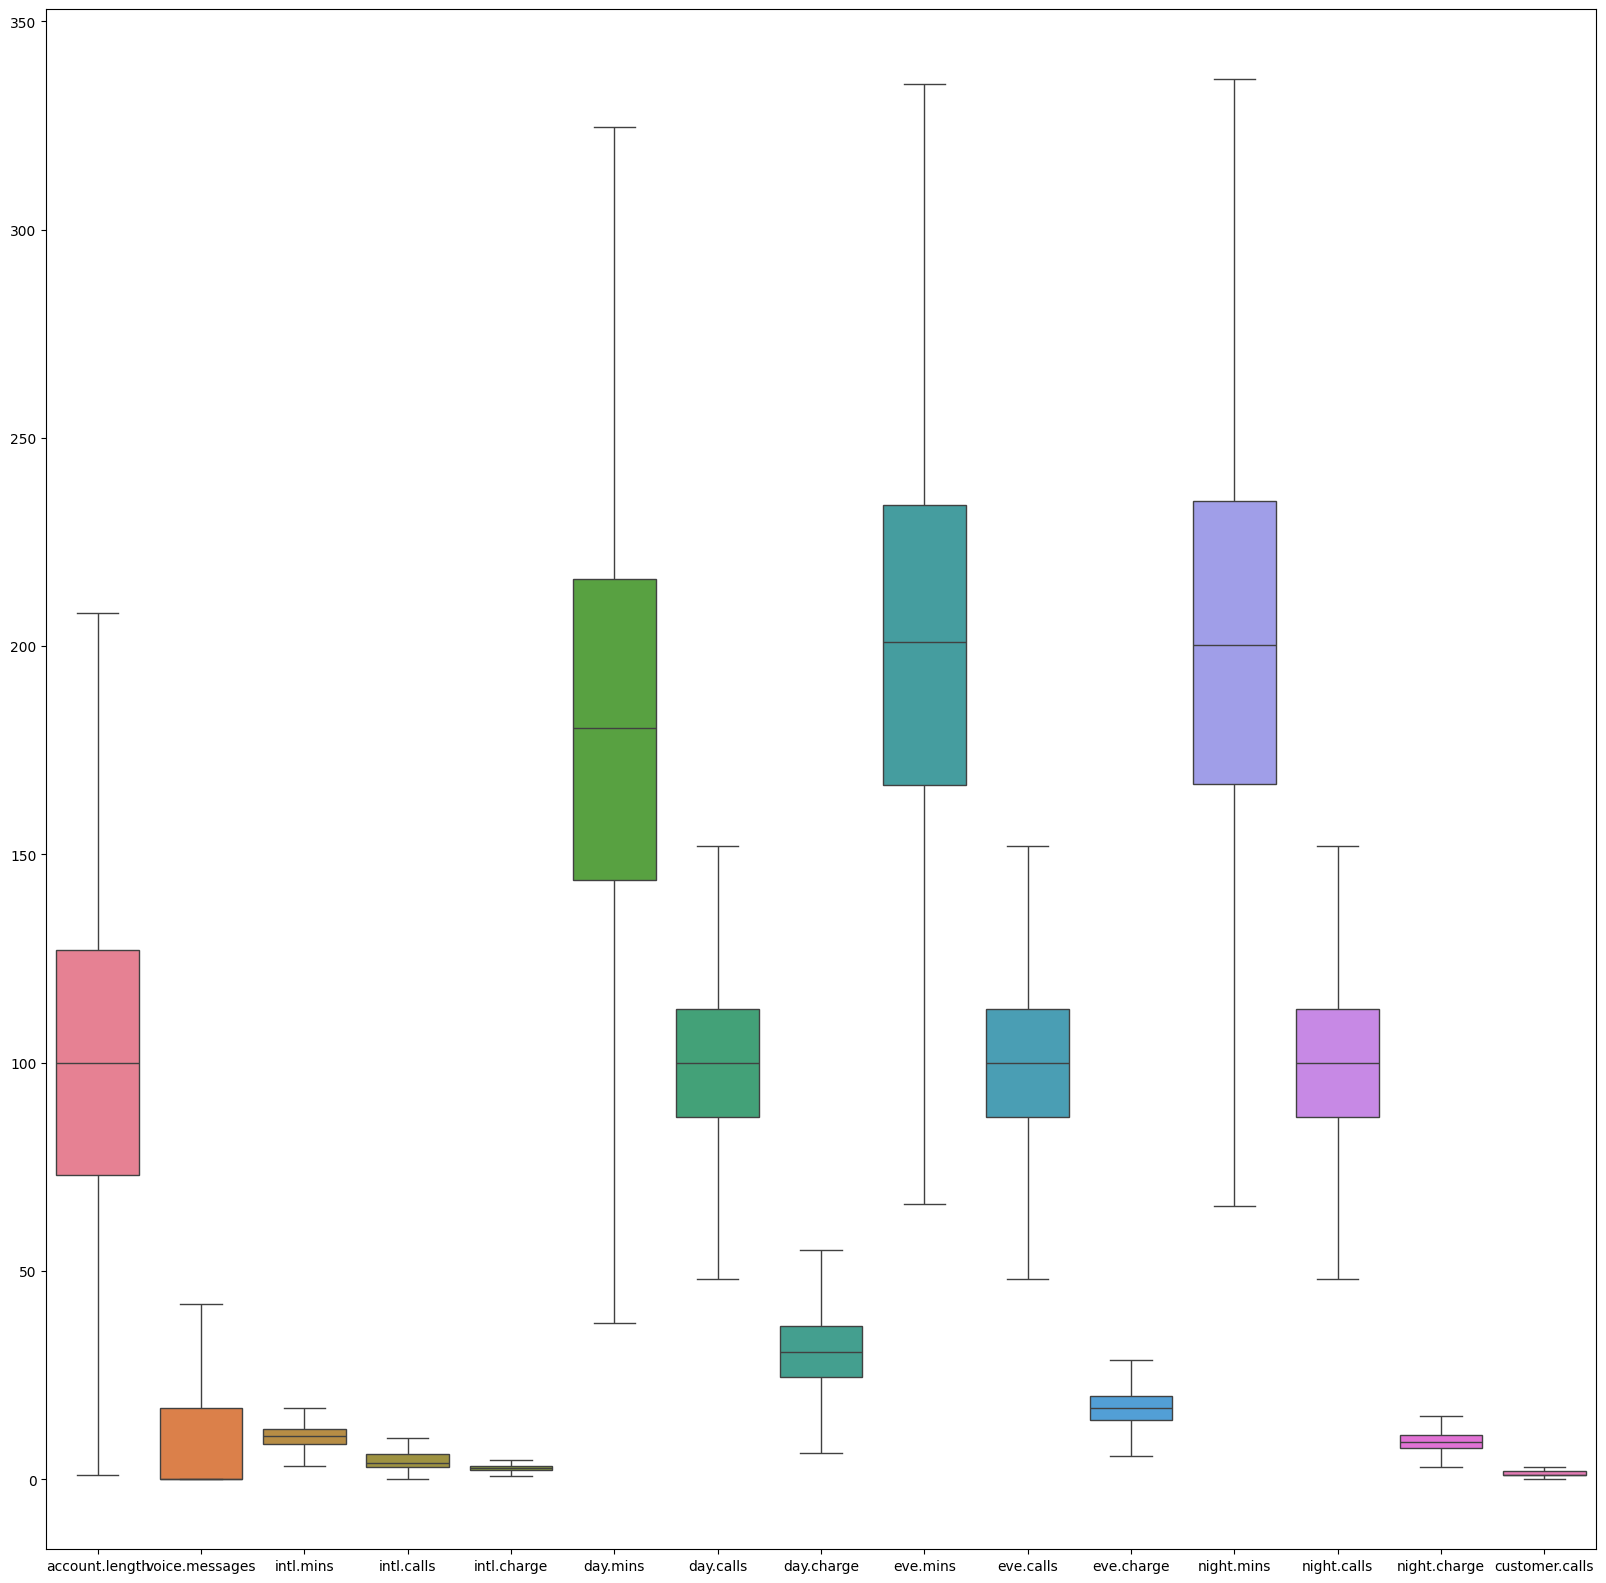

In [48]:
plt.figure(figsize=(20,20))
sns.boxplot(df_num_columns_no_outliers,showfliers=False,whis=1.5)

### Identifying and converting categorical to numerical columns

In [49]:
# Identifying categorical columns in dataset (except for target variable - churn)
cat_columns = df_num_columns_no_outliers.select_dtypes(include=['object','category']).columns.tolist()
cat_columns

['state', 'area.code', 'voice.plan', 'intl.plan', 'churn']

In [50]:
df_customers_cat = df_num_columns_no_outliers.loc[:,['state', 'area.code', 'voice.plan', 'intl.plan','churn']]
df_customers_cat

,state,area.code,voice.plan,intl.plan,churn
slno,,,,,
1,KS,area_code_415,yes,no,no
2,OH,area_code_415,yes,no,no
3,NJ,area_code_415,no,no,no
4,OH,area_code_408,no,yes,no
5,OK,area_code_415,no,yes,no
...,...,...,...,...,...
4996,HI,area_code_408,yes,no,no
4997,WV,area_code_415,no,no,yes
4998,DC,area_code_415,no,no,no


In [51]:
# We have to apply Encoding technique to above dataset and convert categorical to numerical.
le = LabelEncoder()
for col in cat_columns:
    df_customers_cat[col] = le.fit_transform(df_customers_cat[col])
df_customers_cat

,state,area.code,voice.plan,intl.plan,churn
slno,,,,,
1,16,1,1,0,0
2,35,1,1,0,0
3,31,1,0,0,0
4,35,0,0,1,0
5,36,1,0,1,0
...,...,...,...,...,...
4996,11,0,1,0,0
4997,49,1,0,0,1
4998,7,1,0,0,0


### Defining independent and dependent variables

In [52]:
# Defining X -independent variables.
df_customers_cleaned = pd.DataFrame()
for num_col in num_columns:
    df_customers_cleaned[num_col] = df_num_columns_no_outliers[num_col]
df_customers_cleaned

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
slno,,,,,,,,,,,,,,,
1,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1
2,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1
3,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0
4,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2
5,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2
4997,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3
4998,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1


In [53]:
# Modifying the main dataset with encoded categorical columns
for col in cat_columns:
    df_customers_cleaned[col] = df_customers_cat[col]
df_customers_cleaned

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,state,area.code,voice.plan,intl.plan,churn
slno,,,,,,,,,,,,,,,,,,,,
1,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,16,1,1,0,0
2,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,35,1,1,0,0
3,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,31,1,0,0,0
4,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,35,0,0,1,0
5,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,36,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,11,0,1,0,0
4997,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,49,1,0,0,1
4998,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,7,1,0,0,0


In [54]:
X = df_customers_cleaned.iloc[:,0:19]
X

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,state,area.code,voice.plan,intl.plan
slno,,,,,,,,,,,,,,,,,,,
1,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,16,1,1,0
2,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,35,1,1,0
3,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,31,1,0,0
4,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,35,0,0,1
5,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,36,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,11,0,1,0
4997,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,49,1,0,0
4998,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,7,1,0,0


In [55]:
y = df_customers_cleaned.churn
y

,churn
slno,
1,0
2,0
3,0
4,0
5,0
...,...
4996,0
4997,1
4998,0


### Feature selection using Decision Tree

In [56]:
# Will be using Decision Tree classifier to identify the important features in X varaibles.
X

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,state,area.code,voice.plan,intl.plan
slno,,,,,,,,,,,,,,,,,,,
1,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,16,1,1,0
2,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,35,1,1,0
3,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,31,1,0,0
4,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,35,0,0,1
5,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,36,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,11,0,1,0
4997,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,49,1,0,0
4998,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,7,1,0,0


In [57]:
y

,churn
slno,
1,0
2,0
3,0
4,0
5,0
...,...
4996,0
4997,1
4998,0


Feature Importances :
           features  importances
5         day.mins     0.165139
7       day.charge     0.106255
2        intl.mins     0.102707
10      eve.charge     0.092851
3       intl.calls     0.086239
18       intl.plan     0.073958
17      voice.plan     0.066677
8         eve.mins     0.057723
14  customer.calls     0.055714
11      night.mins     0.039979
13    night.charge     0.031823
6        day.calls     0.023920
12     night.calls     0.023149
15           state     0.020762
0   account.length     0.019016
4      intl.charge     0.016270
9        eve.calls     0.008927
1   voice.messages     0.008122
16       area.code     0.000769


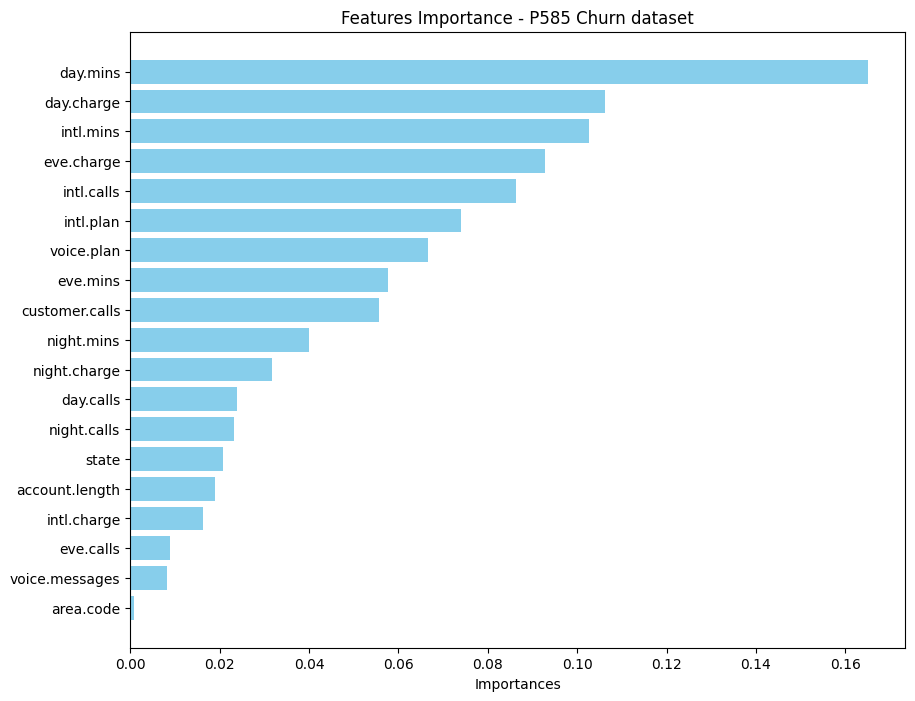

In [58]:
# Train a decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X,y)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to show feature names + importance
feature_importance_df = pd.DataFrame({
    'features':X.columns,
    'importances': importances
})

# Sort by importance descending
feature_importance_df = feature_importance_df.sort_values(by='importances', ascending=False)
print(f'Feature Importances :\n {feature_importance_df}')

# Plotting
plt.figure(figsize=(10,8))
plt.barh(feature_importance_df['features'],feature_importance_df['importances'],color='skyblue')
plt.xlabel('Importances')
plt.title('Features Importance - P585 Churn dataset')
plt.gca().invert_yaxis() # largest importance on the top.
plt.show()

In [59]:
# Dropping columns with less importance
columns_to_remove = ['account.length','intl.charge','day.calls','eve.mins',
                     'night.mins','night.calls','night.charge','customer.calls','state',
                      'voice.plan',	'intl.plan', 'eve.calls','voice.messages','area.code']
df_customers_cleaned_columns = df_customers_cleaned.drop(columns_to_remove,axis = 1)
df_customers_cleaned_columns

,intl.mins,intl.calls,day.mins,day.charge,eve.charge,churn
slno,,,,,,
1,10.0,3,265.1,45.07,16.78,0
2,13.7,3,161.6,27.47,16.62,0
3,12.2,5,243.4,41.38,10.30,0
4,6.6,7,299.4,50.90,5.26,0
5,10.1,3,166.7,28.34,12.61,0
...,...,...,...,...,...,...
4996,9.9,5,235.7,40.07,18.96,0
4997,14.7,2,184.2,31.31,21.83,1
4998,13.6,4,140.6,23.90,14.69,0


In [60]:
# Re-defining X variables.
X = df_customers_cleaned_columns.iloc[:,0:5]
X

,intl.mins,intl.calls,day.mins,day.charge,eve.charge
slno,,,,,
1,10.0,3,265.1,45.07,16.78
2,13.7,3,161.6,27.47,16.62
3,12.2,5,243.4,41.38,10.30
4,6.6,7,299.4,50.90,5.26
5,10.1,3,166.7,28.34,12.61
...,...,...,...,...,...
4996,9.9,5,235.7,40.07,18.96
4997,14.7,2,184.2,31.31,21.83
4998,13.6,4,140.6,23.90,14.69


## Model Building and Evaluation

### Plotting the correlation of new features

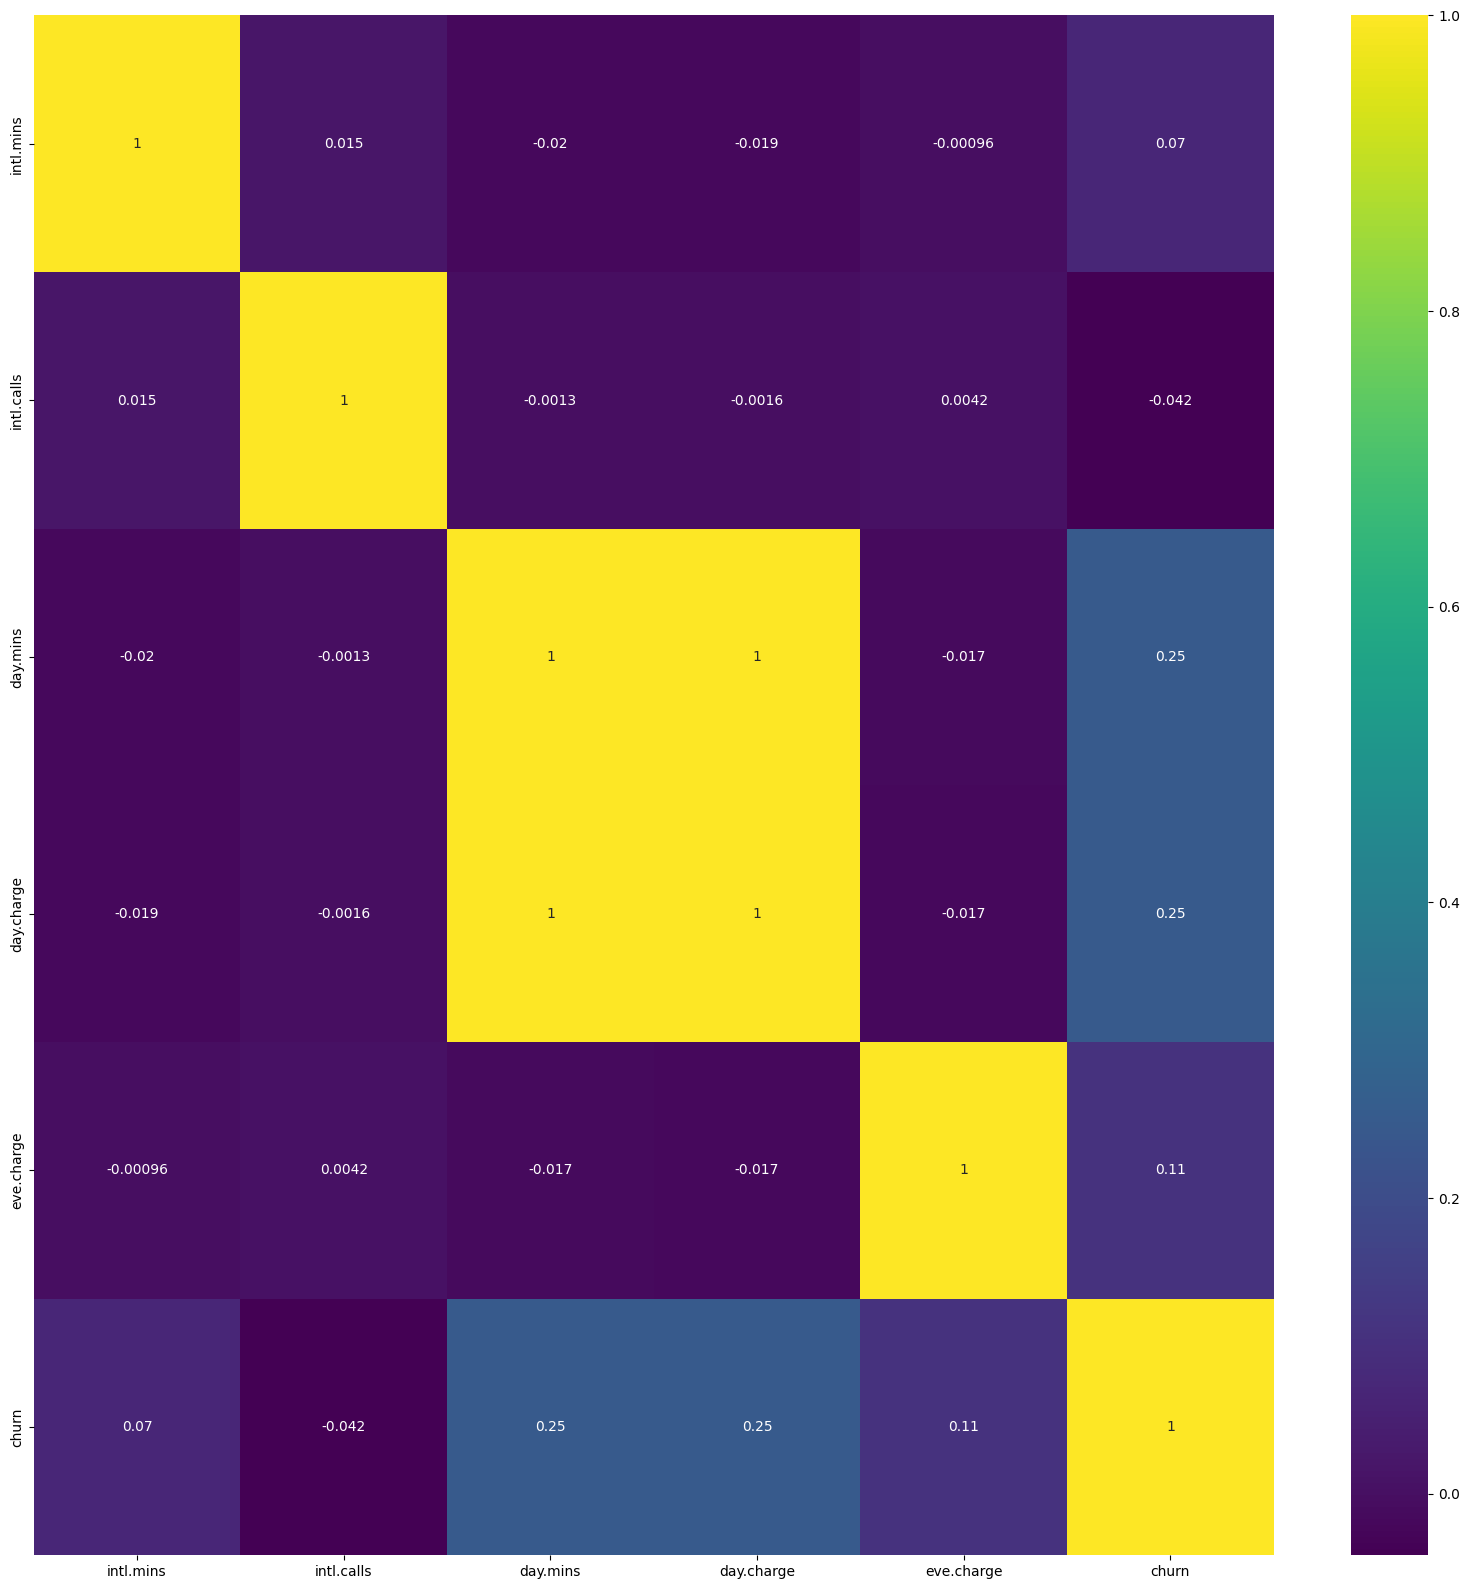

In [61]:
z_new = df_customers_cleaned_columns.corr()

plt.figure(figsize=(20,20))
sns.heatmap(z_new, annot=True, cmap='viridis')
plt.show()

### Scaling dataset

In [62]:
scaled = StandardScaler()
X = scaled.fit_transform(X)
X

array([[-0.09410059, -0.58663012,  1.5729948 ,  1.57322193, -0.06508733],
       [ 1.24277699, -0.58663012, -0.34936198, -0.35015312, -0.10226532],
       [ 0.70079959,  0.22619386,  1.16994995,  1.16996886, -1.57079578],
       ...,
       [ 1.20664516, -0.18021813, -0.73940538, -0.74029227, -0.55072478],
       [-0.63607798,  0.63260585,  0.1558371 ,  0.15582565, -0.57396102],
       [-0.34702337,  4.69672575, -0.94742853, -0.94792935,  1.31049817]])

### Spliting the model

In [63]:
xtrain,xtest, ytrain,ytest = train_test_split(X,y,test_size = 0.2, random_state=42)

### Model building using Logistic Regression

In [64]:
model_logistic = LogisticRegression()
model_logistic.fit(xtrain,ytrain)

LogisticRegression()

In [65]:
ypred_logistic = model_logistic.predict(xtest)
ypred_logistic

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Plotting confusion matrix

Confustion Matrix : 
 [[846 116]
 [  2   7]]


<Axes: >

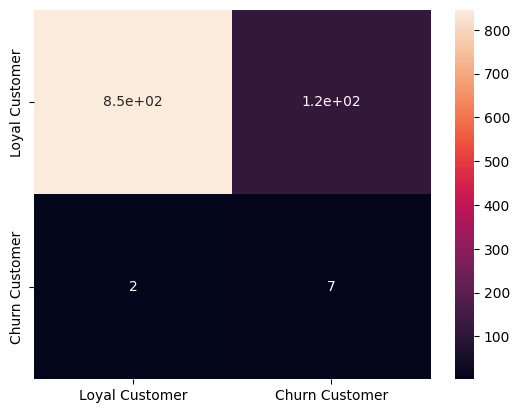

In [66]:
cm_logistics = confusion_matrix(ypred_logistic,ytest)
print(f"Confustion Matrix : \n {cm_logistics}")

sns.heatmap(cm_logistics, annot=True,xticklabels=['Loyal Customer','Churn Customer'],yticklabels=['Loyal Customer','Churn Customer'])

#### Evaluating model - LogisticRegression

In [67]:
cr_logistics = classification_report(ypred_logistic,ytest)
print(f"Classfication Report : \n {cr_logistics}")

Classfication Report : 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93       962
           1       0.06      0.78      0.11         9

    accuracy                           0.88       971
   macro avg       0.53      0.83      0.52       971
weighted avg       0.99      0.88      0.93       971



In [68]:
print(f"F1-score and Accuracy Score : {0.88 * 100 : .2f}%")
print(f"% of Loyal Customers : {933/971 * 100 : .2f}%")
print(f"% of Churn Customers : {38/971 * 100 : .2f}%")

F1-score and Accuracy Score :  88.00%
% of Loyal Customers :  96.09%
% of Churn Customers :  3.91%


### Model building using LGBoost

In [69]:
from lightgbm import LGBMClassifier
model_lgbm = LGBMClassifier()
model_lgbm.fit(xtrain,ytrain)

[LightGBM] [Info] Number of positive: 494, number of negative: 3388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 3882, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.127254 -> initscore=-1.925460
[LightGBM] [Info] Start training from score -1.925460


LGBMClassifier()

In [70]:
ypred_lgbm = model_lgbm.predict(xtest)
ypred_lgbm

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Plotting confustion matrix

Confustion Matrix : 
 [[832  91]
 [ 16  32]]


<Axes: >

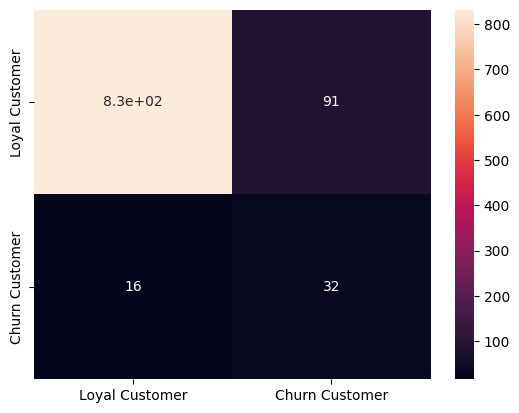

In [71]:
cm_lgbm = confusion_matrix(ypred_lgbm,ytest)
print(f"Confustion Matrix : \n {cm_lgbm}")

sns.heatmap(cm_lgbm, annot=True,xticklabels=['Loyal Customer','Churn Customer'],yticklabels=['Loyal Customer','Churn Customer'])

#### Evaluating model - LGBM

In [72]:
cr_logistics = classification_report(ypred_logistic,ytest)
print(f"Classfication Report : \n {cr_logistics}")

Classfication Report : 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93       962
           1       0.06      0.78      0.11         9

    accuracy                           0.88       971
   macro avg       0.53      0.83      0.52       971
weighted avg       0.99      0.88      0.93       971



In [73]:
print(f"F1-score and Accuracy Score : {0.88 * 100 : .2f}%")
print(f"% of Loyal Customers : {962/971 * 100 : .2f}%")
print(f"% of Churn Customers : {9/971 * 100 : .2f}%")

F1-score and Accuracy Score :  88.00%
% of Loyal Customers :  99.07%
% of Churn Customers :  0.93%


### Using Hyperparameter tuning for increasing accuracy

In [74]:
# Define model and hyperparameter grid
svc = SVC(max_iter=10000, tol=1e-3, cache_size=1000)

param_grid = {
    'C' : [0.1, 1, 10,100],
    'kernel' : ['linear','rbf'],
    'gamma' : ['auto','scale', 0.01,0.001]
}

# 2. Preprocess features: scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)

# Setup GridSearchCV
grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
)

# Fit
grid.fit(X_train_scaled,ytrain)

# Inspect best params and performance
print(f"Best parameters : {grid.best_params_}")
print(f"Best CV Accuracy score : {grid.best_score_}")

# Evaluate test set using best estimator
best_svc = grid.best_estimator_
ypred_best = best_svc.predict(X_test_scaled)
print(f"Best accuracy score : {accuracy_score(ytest, ypred_best)}")
print(f"{classification_report(ytest,ypred_best)}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV Accuracy score : 0.8959299330242144
Best accuracy score : 0.898043254376931
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       848
           1       0.75      0.29      0.42       123

    accuracy                           0.90       971
   macro avg       0.83      0.64      0.68       971
weighted avg       0.89      0.90      0.88       971



In [75]:
print(f"Best F1-score and Accuracy Score : {0.90 * 100 : .2f}%")
print(f"% of Loyal Customers : {848/971 * 100 : .2f}%")
print(f"% of Churn Customers : {123/971 * 100 : .2f}%")

Best F1-score and Accuracy Score :  90.00%
% of Loyal Customers :  87.33%
% of Churn Customers :  12.67%


## Deployment

### Save the model

In [76]:
import joblib
joblib.dump(model_lgbm,"churn-customers.pk1")

['churn-customers.pk1']

In [77]:
import flask
print("Flask installed:", flask.__version__)

Flask installed: 3.1.2


In [78]:
!mkdir -p static

In [79]:
%%writefile static/style.css
body {
    font-family: Arial, sans-serif;
    margin: 20px;
}
h1 {
    color: #333;
}
.form-group {
    margin-bottom: 15px;
}
label {
    display: inline-block;
    width: 150px;
}
input, select {
    padding: 5px;
    width: 200px;
}
button {
    padding: 10px 20px;
    background-color: #007BFF;
    color: white;
    border: none;
    cursor: pointer;
}
button:hover {
    background-color: #0056b3;
}


Writing static/style.css


In [80]:
!mkdir -p templates

In [81]:
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Churn Prediction</title>
    <link rel="stylesheet" href="/static/style.css">
</head>
<body>
    <h1>Telecommunication Churn Prediction (LGBM)</h1>
    <form action="/predict" method="POST">
        <div class="form-group">
            <label>International Minutes:</label>
            <input type="number" step="0.1" name="intl_mins" min="0" value="10.0" required>
        </div>
        <div class="form-group">
            <label>International Calls:</label>
            <input type="number" name="intl_calls" min="0" value="3" required>
        </div>
        <div class="form-group">
            <label>Day Minutes:</label>
            <input type="number" step="0.1" name="day_mins" min="0" value="180.0" required>
        </div>
        <div class="form-group">
            <label>Day Charge:</label>
            <input type="number" step="0.01" name="day_charge" min="0" value="30.0" required>
        </div>
        <div class="form-group">
            <label>Evening Charge:</label>
            <input type="number" step="0.01" name="eve_charge" min="0" value="17.0" required>
        </div>
        <button type="submit">Predict</button>
    </form>
</body>
</html>

Writing templates/index.html


In [82]:
%%writefile templates/result.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Prediction Result</title>
    <link rel="stylesheet" href="/static/style.css">
</head>
<body>
    <h1>Churn Prediction Result</h1>
    {% if error %}
        <p style="color: red;">{{ error }}</p>
    {% else %}
        <p><strong>Predicted Churn:</strong> {{ churn }}</p>
        <p><strong>Churn Probability:</strong> {{ probability }}</p>
        <h3>Input Values:</h3>
        <ul>
            {% for key, value in inputs.items() %}
                <li>{{ key }}: {{ value }}</li>
            {% endfor %}
        </ul>
    {% endif %}
    <a href="/">Back to Home</a>
</body>
</html>

Writing templates/result.html


In [83]:
!ls static # Should show styles.css

style.css


In [84]:
!ls templates  # Should show index.html

index.html  result.html


In [94]:
%%writefile app.py
from flask import Flask, request, render_template
import pandas as pd
import numpy as np
import joblib

app = Flask(__name__)

#Load model and data
try:
  model = joblib.load("/content/churn-customers.pk1")
  data = pd.read_csv("/content/P585 Churn.csv")
except Exception as e:
  print(f"Error in loading files: {e}")
  raise

data.columns = [c.strip().lower().replace(' ', '.') for c in data.columns]
data.replace(['Nan', 'NA', '', None, pd.NA], np.nan, inplace = True)

@app.route('/')
def home():
  return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
  try:
    # Collect user input
    input_data = {
        'intl.mins': float(request.form['intl_mins']),
        'intl.calls': float(request.form['intl_calls']),
        'day.mins': float(request.form['day_mins']),
        'day.charge': float(request.form['day_charge']),
        'eve.charge': float(request.form['eve_charge']),
      }

    input_df = pd.DataFrame([input_data])

    #predict
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]
    churn_label = 'Yes' if prediction == 1 else 'No'

    return render_template('result.html',churn=churn_label,probability=probability,prediction=f"{prediction:.2%}", inputs = input_data)
  except Exception as e:
    return render_template('result.html', error = f"Error : {str(e)}")
if __name__ == '__main__':
  app.run(host='0.0.0.0',port=5000, debug = True)


Overwriting app.py


In [89]:
!pip install flask pyngrok pandas numpy scikit-learn joblib gunicorn


In [95]:
from pyngrok import ngrok
!ngrok authtoken 34Vcvj3DcrIN0fYMjHXnbF2oUn9_7uKDL3sp8JDbeMgkqo2Jq  # token
!python app.py &>/dev/null &
public_url = ngrok.connect(5000)
print(f"App running at: {public_url}")


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
App running at: NgrokTunnel: "https://babyishly-subpetiolated-ashton.ngrok-free.dev" -> "http://localhost:5000"
